# Calculations of MR in Rhombohedral graphene

## Load packages

In [29]:
using Optics_in_the_length_gauge
using PhysicalConstants
using PhysicalConstants.CODATA2018
using Unitful
using Statistics
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
# add https://github.com/fernandopenaranda/Optics_in_the_length_gauge
# units meV, fs, K

proj_folder = dirname(pwd())
rhomb_folder = proj_folder * "/model/rhombohedral/"
common_folder = proj_folder * "/comfunctions/"

include(rhomb_folder * "model.jl")
include(rhomb_folder * "observables.jl")
include(rhomb_folder * "plotters.jl")
include(rhomb_folder * "wrapper_lmc.jl")
include(common_folder * "separate_contributions.jl")

plotmap! (generic function with 1 method)

In [3]:
# using GLMakie

## Calculations

### Presets

In [125]:
μlist = collect(0:0.2:10)
p = Params_rhombohedral(1, 0, 3160, 390,-20, 315, 0*44, 2, 1)
T = 2
B = 10
evals = 5000
N = 5
T = 2 #evals 80000 not perfect
τ = 200

200

### Bands

In [63]:
# using CairoMakie
# CairoMakie.disable_mime!("svg", "pdf", "text/html")

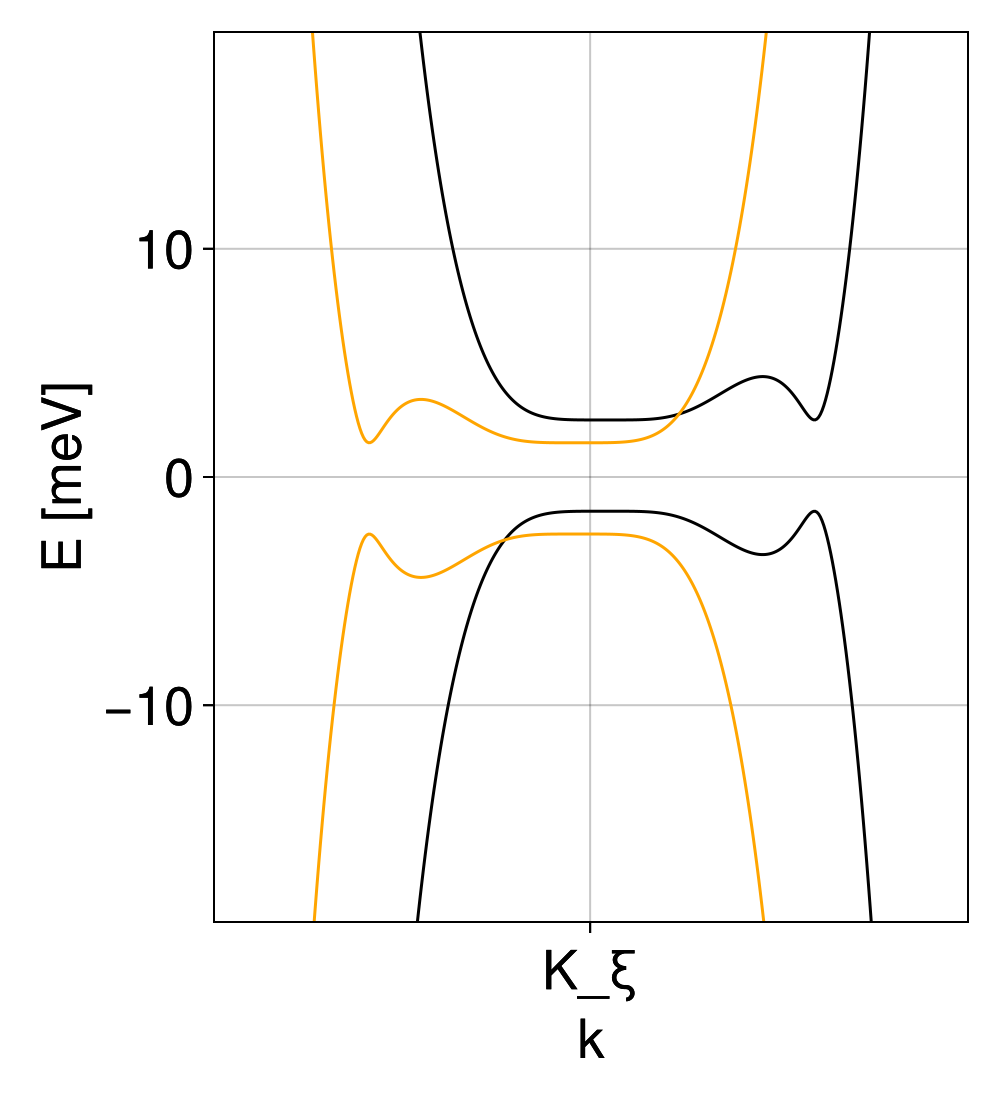

In [109]:
 # number of layers
fig = abcNplotbandsk(N,200, Params_rhombohedral(p, ξ =1))
abcNplotbandsk(fig, N, 200, Params_rhombohedral(p, ξ =-1))

In [65]:
# using BZpaths
# Rs = ([√3/2,1/2,], [0,1.0])                 # Lattice vectors, can be 2d or 3d
# high_sym_line = [:Γ, :M, :X, :Γ]            # Custom k-path over high symmetry momenta
# sgnum = 17                                 # point group (17 = 2d triangular lattice)
# N = 100                            # points in the k-mesh
# plot_kpath(Rs, sgnum, N)

## Integral observables

In [3]:
lmc_presets(N, μ,ξ, p::Params_rhombohedral; kws...) =  xxx_lmc_presets(N, μ, ξ, p; kws...)
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
lmcshift_presets(μ,ξ) = xxx_lmc_presets(N, μ, ξ, p; evals = evals, T = T, fermi_surface = false, with_shift = true)

lmcshift_presets (generic function with 1 method)

#### DOS

In [7]:
lmc0p = lmcnoshift_presets(0,1,1e5) #1e6
lmc0n = lmcnoshift_presets(0,-1,1e5) #1e6

ω, j = c_dos(lmc0p, μlist, η = 0.05)
ω, j2 = c_dos(lmc0n, μlist, η = 0.05)

([0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009  …  0.0091, 0.0092, 0.009300000000000001, 0.0094, 0.0095, 0.0096, 0.009699999999999999, 0.009800000000000001, 0.0099, 0.01], [1.3304980935660044e16, 1.4028444857099484e16, 1.4959129688019986e16, 1.6148957195051114e16, 1.7672892004554772e16, 1.9641534719020756e16, 2.2223054624322748e16, 2.5683379658088544e16, 3.0464623909057456e16, 3.735067791942247e16  …  1.6742698460090928e17, 1.6599463610269398e17, 1.6370403533805645e17, 1.6258510637560182e17, 1.5916799965998067e17, 1.646661508740491e17, 1.6136744551474208e17, 1.572520003137852e17, 1.462887062195364e17, 1.4287450371600237e17])

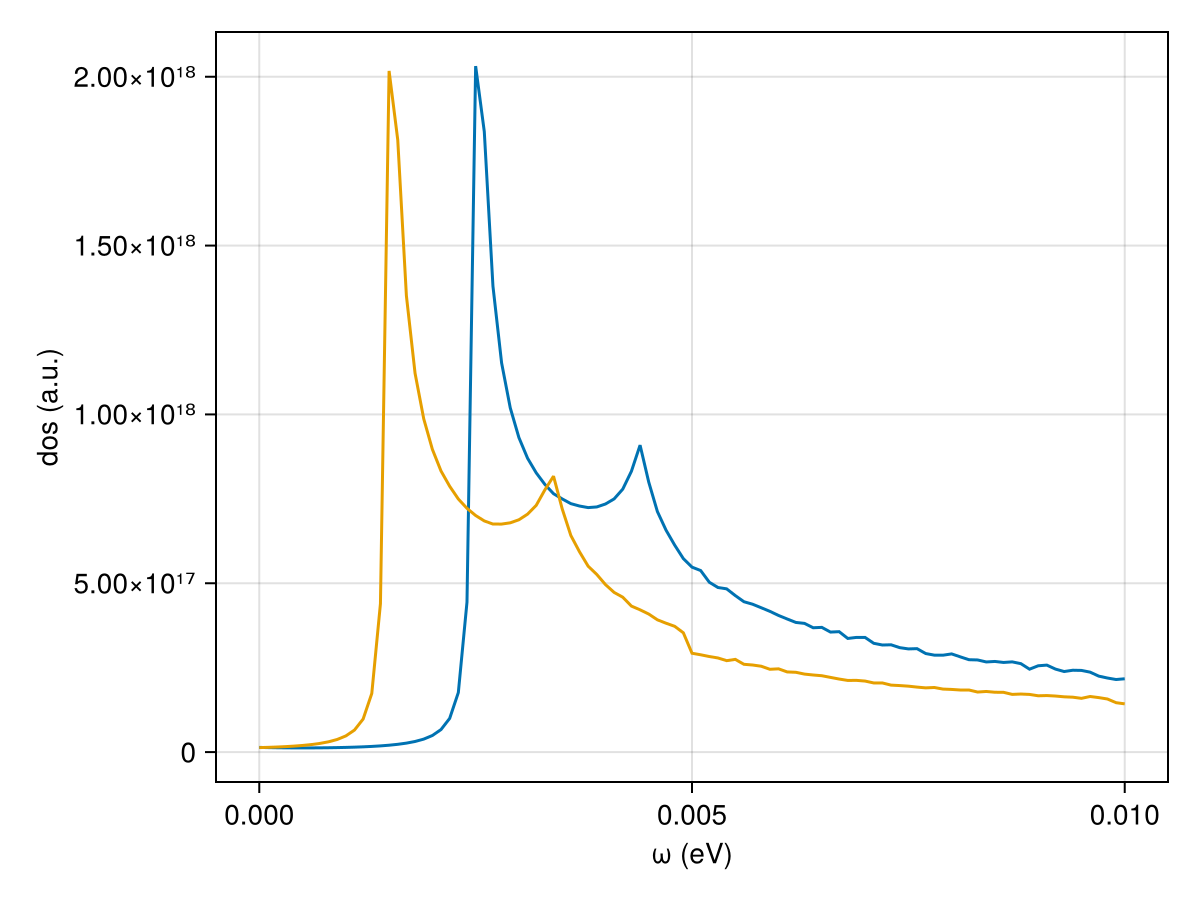

In [8]:
fig = Figure(); ax = Axis(fig[1,1], xlabel = "ω (eV)", ylabel = "dos (a.u.)")
lines!(ax, ω, j)
lines!(ax, ω, j2)
fig

### LMC

In [82]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = false, 
     fermi_surface = false, with_shift = false)

lmcnoshift_presets (generic function with 1 method)

In [ ]:
lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(μ, -1, evals))
     for μ in μlist];

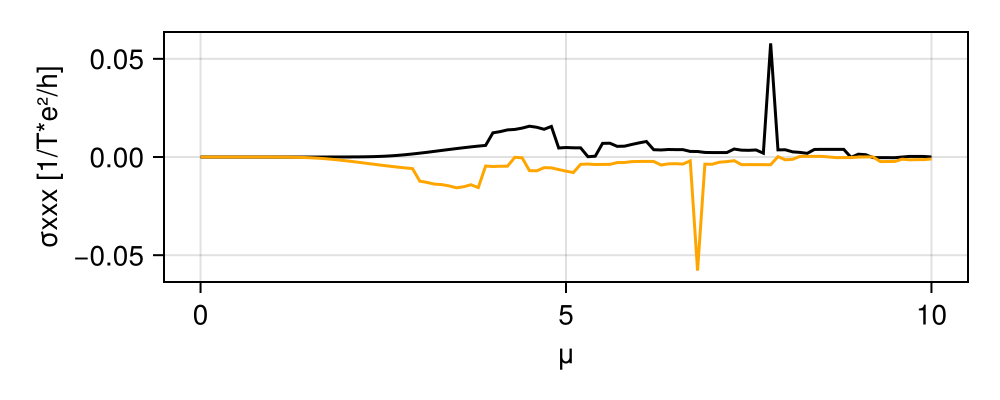

In [11]:
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
lines!(ax, μlist, -lmcnv, color = :orange)
fig

### LMC shift correction.

In [ ]:
lmcnoshift_presets(μ,ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
     T = T, τ = τ, berry_contribution = true, omm_contribution = false, 
     fermi_surface = false, with_shift = true)
lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(μ, 1, evals))
     for μ in μlist];
# lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(μ, -1, evals))
#      for μ in μlist];

In [6]:
fig = Figure(size = (500,200)) 
ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx [1/T*e²/h]")
lines!(ax, μlist, -lmcpv, color = :black)
# lines!(ax, μlist, -lmcnv, color = :orange)
fig

UndefVarError: UndefVarError: `lmcpv` not defined

### Drude conductivtiy

In [84]:
xx_drude_presets(μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)

xx_drude_presets (generic function with 5 methods)

In [60]:
drudepv = [drude_conductivity(xx_drude_presets(μ,1)) for μ in μlist];
drudenv = [drude_conductivity(xx_drude_presets(μ,-1)) for μ in μlist];

### LMC/Drude

In [181]:
evals = 100000
μlist = collect(0:1:10)
T = 10
xx_drude_presets(N, μ,ξ, evals) = 
    xx_drude_presets(N, μ, ξ, p; evals = evals, T = T)
lmcnoshift_presets(N, μ, ξ, evals) = xxx_lmc_presets(N, μ, ξ, p; evals = evals,
    T = T, τ = τ, berry_contribution = true, omm_contribution = true, 
    fermi_surface = false, with_shift = false)

lmcpv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, 1, evals))
     for μ in μlist];
lmcnv = [linear_magneto_conductivity(lmcnoshift_presets(N, μ, -1, evals))
     for μ in μlist];
drudepv = [drude_conductivity(xx_drude_presets(N, μ, 1, evals)) for μ in μlist];
drudenv = [drude_conductivity(xx_drude_presets(N, μ, -1, evals)) for μ in μlist];

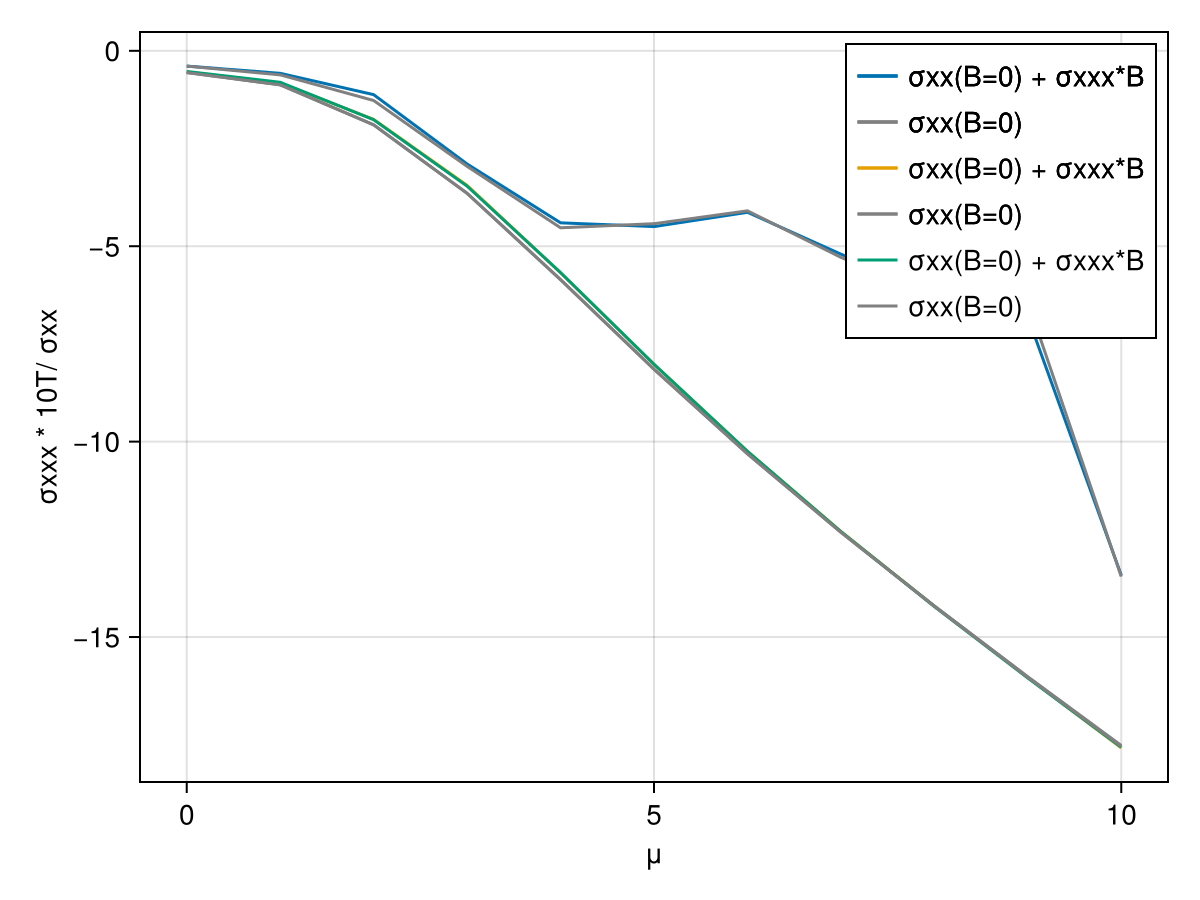

In [182]:
B = 10
# fig = Figure()
# ax = Axis(fig[1,1], xlabel = "μ", ylabel = "σxxx * $(B)T/ σxx")
# lines!(ax, μlist, lmcpv .*B ./ drudepv, color = :gray)
# lines!(ax, μlist, lmcnv .*B ./  drudenv, color = :orange)
# scatter!(ax, μlist, (lmcpv+ lmcnv) .*B ./ (drudepv +drudenv))
lines!(ax, μlist, (lmcpv+ lmcnv) .*B + (drudepv +drudenv), label = "σxx(B=0) + σxxx*B")
lines!(ax, μlist,(drudepv +drudenv), color = :gray, label = "σxx(B=0)")
axislegend(ax)#, position = (1,1))
# ylims!(ax, [-0.2,0.2])
fig

### Anomalous Hall Effect

In [ ]:
# each valley contributes with N/2 e^2/h

In [72]:

μ = 0
ξ = -1
T = 0.5
N = 2
evals = 10000
μlist = collect(-10:0.2:10)

ahe_p(μ, ξ) = σxyahe_presets(N, μ, ξ, p, evals = evals, T = T)
ahe_pos = [σij_anomalous_hall(ahe_p(μ, 1)) for μ in μlist];
ahe_neg = [σij_anomalous_hall(ahe_p(μ, -1)) for μ in μlist];
ahe[1]

-0.2049074801515913

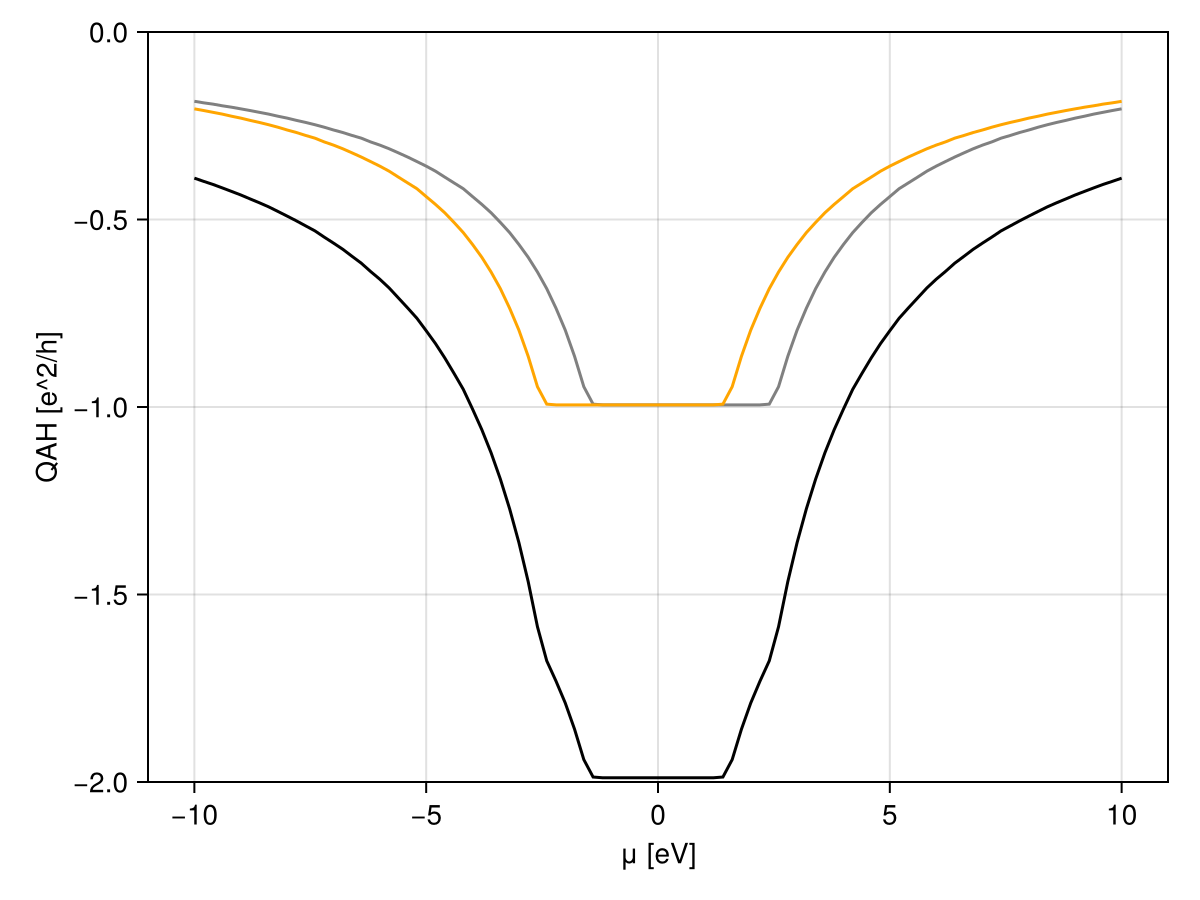

In [74]:
fig = Figure()
ax = Axis(fig[1,1], xlabel = "μ [eV]", ylabel = "QAH [e^2/h]")
lines!(ax, μlist, ahe_pos, color =:gray)
lines!(ax, μlist, ahe_neg, color =:orange)
lines!(ax, μlist, ahe_pos+ahe_neg, color =:black)
ylims!(-N,0)
fig 

## TESTS

### K-resolved plots

In [ ]:
# p = lmcnoshift_presets(μ,ξ, Ω_contr = true, omm_contr = true, fermi_surface = false, with_shift = true)
# kxs, kys, Zs = kresolvedlmc(p; points = 300, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)
# plotmap(kxs,kys, Zs, Ω_contr = p.Ω_contr, omm_contr = p.omm_contr, fermi_surface = p.fermi_surface, with_shift = p.shift)

In [51]:
include(rhomb_folder * "wrapper_lmc.jl")
include(common_folder * "separate_contributions.jl")

function lmc_fig_contribution(μ, ξ, pR::Params_rhombohedral; N= 5, points = 100, T = 1)
    pΩandomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = true, fermi_surface = false, with_shift = false)
    pΩ_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = true, omm_contribution = false, fermi_surface = false, with_shift = false)
    pomm_contr = xxx_lmc_presets(N, μ, ξ, pR; T = T, berry_contribution = false, omm_contribution = true, fermi_surface = false, with_shift = false)

    fig = Figure(size=(2*600,600))
    ax1 = Axis(fig[1, 1], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω and OMM. T = $(T)K")
    ax2 = Axis(fig[1, 2], xlabel = "kx", ylabel = "ky", title = "Contributions: Ω. T = $(T)K")
    ax3 = Axis(fig[1, 3], xlabel = "kx", ylabel = "ky", title = "Contributions: OMM. T = $(T)K")
    kres(p) = kresolvedlmc(pR, p; points = points, Ω_contr = p.berry_contribution, omm_contr = p.omm_contribution, fermi_surface = p.fermi_surface, with_shift = p.with_shift)
    
    # components of the lmc
    kxs, kys, Z1s = kres(pΩandomm_contr)
    kxs, kys, Z2s = kres(pΩ_contr)
    kxs, kys, Z3s = kres(pomm_contr)

    # compute in-plane berry
    kxs, kys, Z5s = kresolved_Ωin(pR, pΩandomm_contr, points = points) 
    kxs, kys, Z6s = kresolved_dOMM(pR, pΩandomm_contr, points = points)
    kxs, kys, Z7s = kresolved_Ωz(pR, pΩandomm_contr, points = points)

    m2toang2 = 1e20
    prefactor = 1e6
    Z1s .*= m2toang2
    Z2s .*= m2toang2
    Z3s .*= m2toang2
    Z5s .*= m2toang2 / prefactor
    Z7s .*= m2toang2

    m = minimum([minimum(Z) for Z in [Z1s, Z2s, Z3s]])
    M = maximum([maximum(abs.(Z)) for Z in [Z1s, Z2s, Z3s]])

    println( maximum(Z7s) )
    colrange = [-1,1] .* 3e4 #[m, M]
    colrange2 = [-1,1] .* 2
    colrange3 = [-1,1] .* 2

    colmap =  cgrad([:red, :black, :lightblue])
    colmap2 = cgrad([:red, :white, :lightblue])


    plotmap!(ax1, kxs, kys, Z1s, colrange = colrange, colmap = colmap)
    plotmap!(ax2, kxs, kys, Z2s, colrange = colrange, colmap = colmap)
    hm = plotmap!(ax3, kxs, kys, Z3s, colrange = colrange, colmap = colmap)

    
    ax4 = Axis(fig[1:2, 0]; xlabel = "kx", ylabel = "E [meV]")
    abcplotbandsk(ax4, points, p; ylims = [-1, 1], color = :black)
    hlines!(ax4, μ) 
    ax5 = Axis(fig[2, 2], xlabel = "kx", ylabel = "ky", title = "Ωx")
    hm2 = plotmap!(ax5, kxs, kys, Z5s, colrange = colrange2, colmap = colmap2)
    ax6 = Axis(fig[2,3], xlabel = "kx", ylabel = "ky", title = "d_OMMxx")
    hm3 = plotmap!(ax6, kxs, kys, Z6s,colrange = colrange3, colmap = colmap2)
    ax7 = Axis(fig[2, 1], xlabel = "kx", ylabel = "ky", title = "Ωz") 
    plotmap!(ax7, kxs, kys, Z7s,colrange = colrange2, colmap = colmap2)
    
    # # cb = Colorbar(fig[3, 2], hm2)
    Colorbar(fig[1,4], hm, label = "LMC integrand")
    Colorbar(fig[3,2], hm2, vertical = false,  flipaxis = false , label = "Å^2/eV [x$(prefactor)]")
    Colorbar(fig[3,3], hm3, vertical = false,  flipaxis =false, label = "m^3/(eV*s)")
    
    hideydecorations!(ax2)
    hidexdecorations!(ax1)
    hidexdecorations!(ax2)
    hidexdecorations!(ax3)


    hideydecorations!(ax3)
    hideydecorations!(ax5)
    hideydecorations!(ax6)
    return fig
end

lmc_fig_contribution (generic function with 1 method)

3.441212615002245e-11


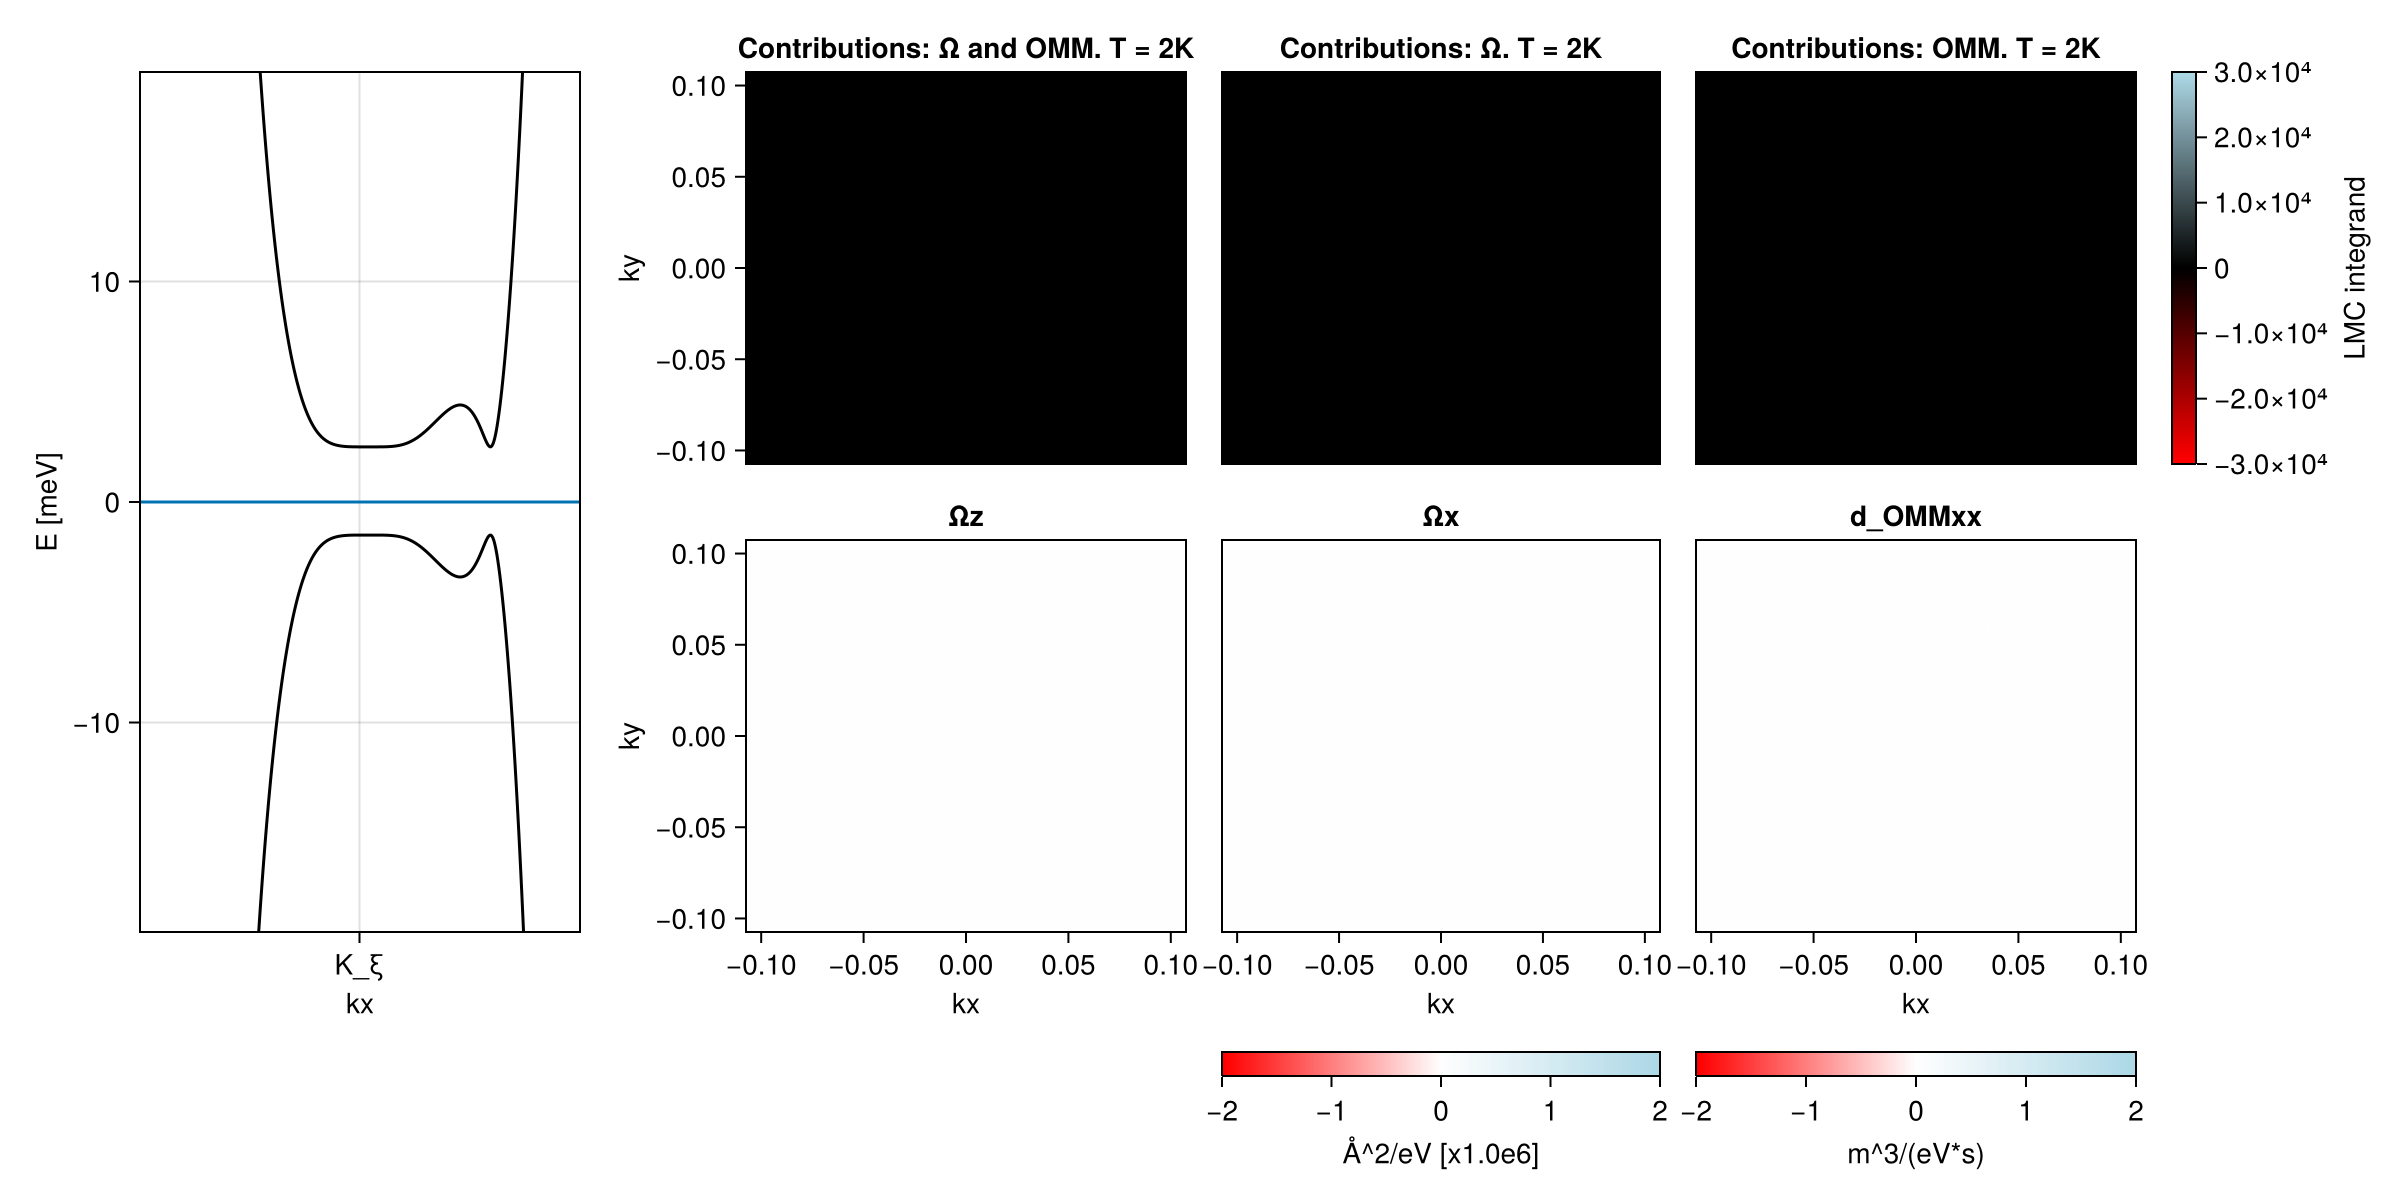

In [55]:
lmc_fig_contribution(0,-1, p, N = 5, points = 200, T = 2)

In [40]:
# T = 10

# pts = range(-1, 1, length=100)
# ts = reshape(1:T, 1, 1, :)
# topo = cos.(pts) .+ cos.(ts .* pts')

# fig = Figure()
# ax = Axis(fig[1, 1])

# sg = SliderGrid(fig[2,1],
#     (label="time", range=1:T))

# time = sg.sliders[1].value

# str = lift(t -> "[$t ms]", time)
# text!(ax, str)

# topo_slice = lift((t, data) -> data[:, :, t], time, topo)
# contour!(ax, topo_slice)

# hidedecorations!(ax)
# hidespines!(ax) 
# fig

In [1]:
fig = abcNplotbandsk(N,200, Params_rhombohedral(p, ξ =1))
abcNplotbandsk(fig, N, 200, Params_rhombohedral(p, ξ =-1))

UndefVarError: UndefVarError: `N` not defined

In [45]:
maximum(b)

1.2031103488102575e-17

### LMC contributions resolved

#### Extra

In [ ]:
lmcnoshift0p = lmcnoshift_presets(0,1)
q = [0,0.00000000]
ϵs, ψs = eigen(Matrix(lmcnoshift0p.h(q)))
dhh(q) = lmcnoshift0p.nabla_h(q)
dhx = dhh(q)[1]
dhy = dhh(q)[2]

Optics_in_the_length_gauge.k_linear_mr_integrand(:x,:x,:x, ϵs, ψs, lmcnoshift0p.rz(q, ψs), dh[1], dh[2], lmcnoshift0p.nabla_nabla_h(q), 2, 1;
Ω_contr = true, omm_contr = true, fermi_surface = false)     
using Arpack
    using LinearAlgebra
    using Cubature
    using ProgressMeter
    using Base.Threads
    using Distributed
    using Dierckx
    using PhysicalConstants
    using PhysicalConstants.CODATA2018
    using Unitful
    using SparseArrays
    using StaticArrays
    using Parameters

ang_to_m = 1e-10
const kB = (PhysicalConstants.CODATA2018.k_B |> u"eV/K").val
const ħ = PhysicalConstants.CODATA2018.ħ
const e = PhysicalConstants.CODATA2018.e
const C = ((e^3 / ħ^2) |> u"μA/V^2/s").val
const C_cd = ((e^2/ħ) |> u"μA/V").val
const ħ_ev_s = (ħ |> u"eV*s").val
i = :x;
j = i 
k = j
rz = lmcnoshift0p.rz(q, ψs)

omega = Optics_in_the_length_gauge.Ω(ϵs)
Δx = Optics_in_the_length_gauge.Δ(ψs, dhx) * ang_to_m
Δy = Optics_in_the_length_gauge.Δ(ψs, dhy) * ang_to_m
rx = Optics_in_the_length_gauge.r(ϵs, ψs, dhx) * ang_to_m
ry = Optics_in_the_length_gauge.r(ϵs, ψs, dhy) * ang_to_m
vx = Optics_in_the_length_gauge.vel(ψs, dhx) * ang_to_m/ ħ_ev_s
vy = Optics_in_the_length_gauge.vel(ψs, dhy) * ang_to_m/ ħ_ev_s
vi = Optics_in_the_length_gauge.which_mat(i, vx, vy)
vj = Optics_in_the_length_gauge.which_mat(j, vx, vy)
r_not_k = Optics_in_the_length_gauge.which_mat(k, ry, rx)
Optics_in_the_length_gauge.mr_Ω(:x,:x,:x, rz, rx, ry, vx, vy)